In [40]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import sys, os, logging, timeit
from pathlib import Path as Pathlb


from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import itertools

import seaborn as sns


from statannot import add_stat_annotation



<AxesSubplot:xlabel='features'>

<Figure size 1440x1440 with 0 Axes>

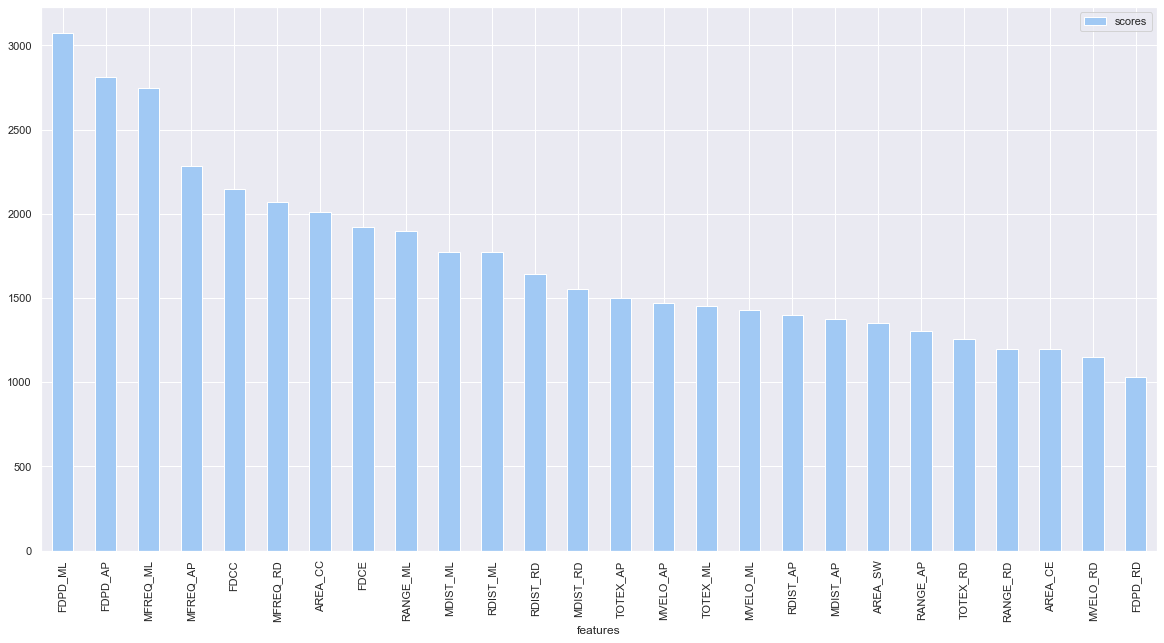

In [176]:
working_path = os.getcwd()
DF = pd.read_excel(os.path.join(working_path[:-5], "temp", "DF1.xlsx"))
DF.columns=["Rank", "D-prime", "F-ratio", "mRMR-Dif", "mRMR-Q", "Redundancy", "ID"]
DF

<AxesSubplot:xlabel='Count', ylabel='Redundancy'>

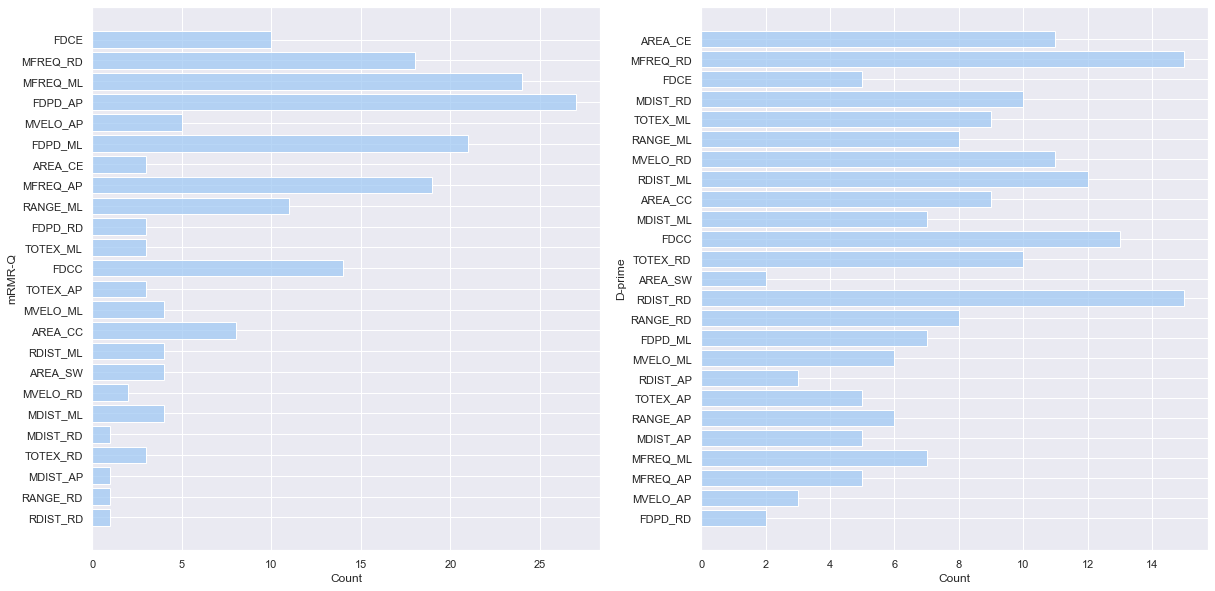

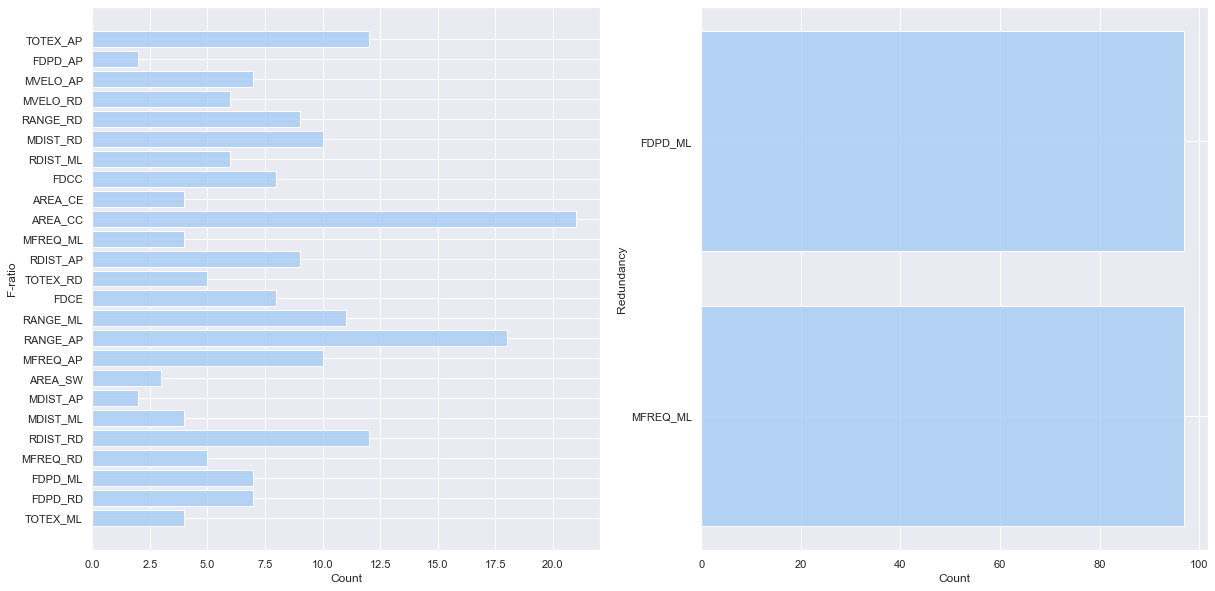

In [177]:
a = DF[ DF["Rank"]==1 ]
sns.set_palette("pastel")
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
sns.histplot(data=a, y="mRMR-Q", stat="count", bins=26, shrink=.8, label="mRMR", legend=True)
plt.subplot(1,2,2)
sns.histplot(data=a, y="D-prime", stat="count", bins=26, shrink=.8, label="D-prime", legend=True)
plt.figure(figsize=(20, 10))

plt.subplot(1,2,1)
sns.histplot(data=a, y="F-ratio", stat="count", bins=26, shrink=.8, label="F-ratio", legend=True)
plt.subplot(1,2,2)
sns.histplot(data=a, y="Redundancy", stat="count", bins=26, shrink=.8, label="Redundancy", legend=True)
# plt.legend(loc="best")



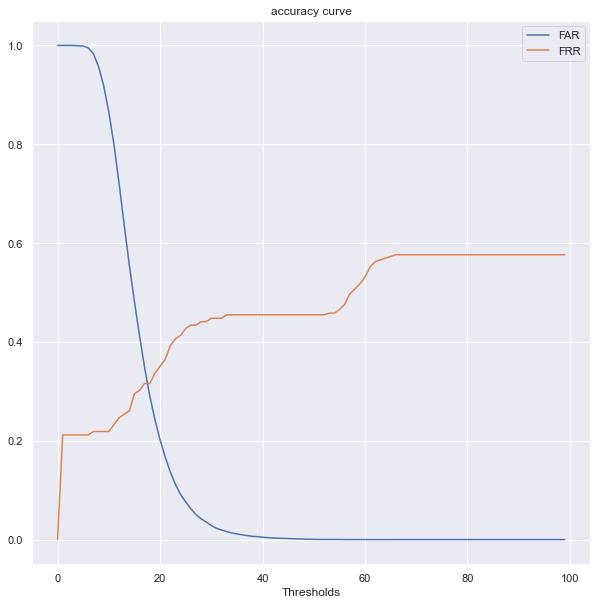

In [70]:
DD = pd.read_excel(os.path.join(working_path[:-5], "Archive", "results on testsize", "DF.xlsx"))
DD = DD[ DD["Test_Size"]== 0.9 ]
DD = DD[ DD["Mode"] == "dist"]
DD = DD.iloc[:, 26:].mean(axis=0)
a = ["FAR_L_"+str(i) for i in range(100)]
b = ["FRR_L_"+str(i) for i in range(100)]
sns.set()
plt.figure(figsize=(10,10))
plt.plot([i for i in range(100)], DD.loc[a], label="FAR")
plt.plot([i for i in range(100)], DD.loc[b], label="FRR")
plt.title("accuracy curve")
plt.xlabel("Thresholds")
plt.legend(loc="best")



     sub        acc   f1-score Normalization method
0      5  90.200000  91.484848              z-score
1      6  90.600000  92.081252              z-score
2      7  92.500000  93.296703              z-score
3      8  82.666667  86.261905              z-score
4      9  92.500000  93.644444              z-score
..   ...        ...        ...                  ...
762  100  84.000000  87.047619              z-score
763  101  79.250000  79.219048              z-score
764   94  67.000000  70.238961              z-score
765  102  70.333333  70.057143              z-score
766  103  78.250000  80.523478              z-score

[767 rows x 4 columns]
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

z-score v.s. Minmax: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.652e-03 U_stat=8.159e+04


(<AxesSubplot:xlabel='Normalization method', ylabel='f1-score'>,
 [<statannot.StatResult.StatResult at 0x16b46951e20>])

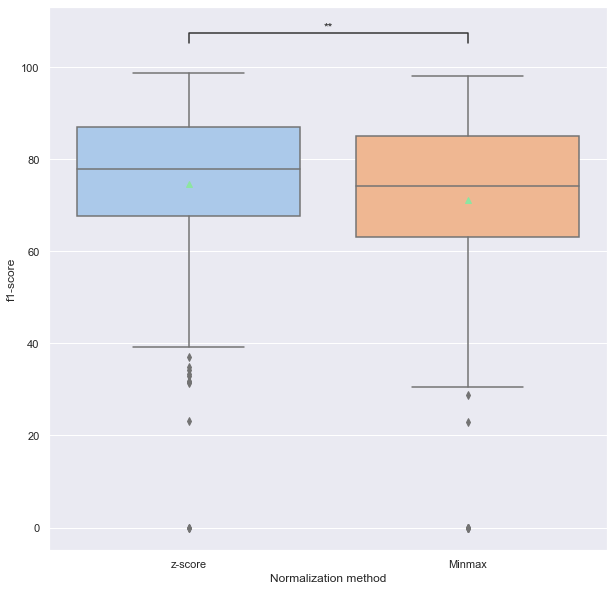

In [208]:
from statannot import add_stat_annotation

folder1 = "1.0_z-score_All_corr_min_0.0_None_2"
path = os.path.join(working_path[:-5], "Archive", "results on testsize", "DF1.xlsx")
Results_DF_1 = pd.read_excel(path, )
Results_DF_1.columns=["sub", "acc", "f1-score", "Normalization method"]
# Results_DF_1 = Results_DF_1[ Results_DF_1["feature type"] == "COP"]
print(Results_DF_1)

x = "Normalization method"
y = "acc"
y = "f1-score"
box_pairs=[

    ("Minmax", "z-score"),

    ]

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=Results_DF_1, y=y,  x=x, showmeans=True,)
add_stat_annotation(ax, data=Results_DF_1, y=y, x=x,  
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
# plt.legend(loc='upper left', bbox_to_anchor=(0, 1.16))

In [240]:
import glob
path = os.path.join(working_path[:-5], "Archive", "results WS3", "pfeatures", "**", "*.xlsx")
df_all = pd.DataFrame()
for i in glob.glob(path):
    df = pd.read_excel(i, index_col = 0)
    foldername = i.split("\\")[-2]
    # print(foldername.split("_"))
    df["Normalization method"] = foldername.split("_")[1]
    df["Criteria"] = foldername.split("_")[4]
    df["PCA"] = foldername.split("_")[0]
    # print(df)
    # sys.exit()
    df_all = df_all.append(df)

df_all

,subject ID,mean(acc),mean(f1),mean(eer),# positive samples training,# positive samples test,# negative samples test,test_ratio,EER,t_idx,...,FRR_93,FRR_94,FRR_95,FRR_96,FRR_97,FRR_98,FRR_99,Normalization method,Criteria,PCA
0,4,53.600000,46.924387,0.464000,11,5,411,0.3,0.355455,75,...,1.0,1.0,1.0,1.0,1.0,1.0,1,minmax,average,0.8
1,5,81.200000,81.478788,0.188000,13,5,410,0.3,0.173846,78,...,1.0,1.0,1.0,1.0,1.0,1.0,1,minmax,average,0.8
2,6,84.200000,87.092241,0.158000,12,5,410,0.3,0.281667,76,...,1.0,1.0,1.0,1.0,1.0,1.0,1,minmax,average,0.8
3,7,74.666667,72.947319,0.253333,14,6,410,0.3,0.135714,72,...,1.0,1.0,1.0,1.0,1.0,1.0,1,minmax,average,0.8
4,8,48.666667,40.514286,0.513333,8,3,412,0.3,0.305000,73,...,1.0,1.0,1.0,1.0,1.0,1.0,1,minmax,average,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,100,83.333333,86.809524,0.166667,8,3,436,0.3,0.388750,26,...,1.0,1.0,1.0,1.0,1.0,1.0,1,z-score,min,1.0
92,101,75.750000,76.457143,0.242500,9,4,436,0.3,0.224444,25,...,1.0,1.0,1.0,1.0,1.0,1.0,1,z-score,min,1.0
93,94,80.250000,84.501010,0.197500,11,4,435,0.3,0.392727,22,...,1.0,1.0,1.0,1.0,1.0,1.0,1,z-score,min,1.0
94,102,68.666667,68.952381,0.313333,7,3,437,0.3,0.181429,25,...,1.0,1.0,1.0,1.0,1.0,1.0,1,z-score,min,1.0


['0.8' '0.95' '0.9' '1.0']
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

median v.s. min: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.309e-17 U_stat=9.705e+05
average v.s. median: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.275e-03 U_stat=1.266e+06
average v.s. min: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.933e-06 U_stat=1.062e+06


(<AxesSubplot:xlabel='Criteria', ylabel='mean(acc)'>,
  <statannot.StatResult.StatResult at 0x16b4aba07f0>])

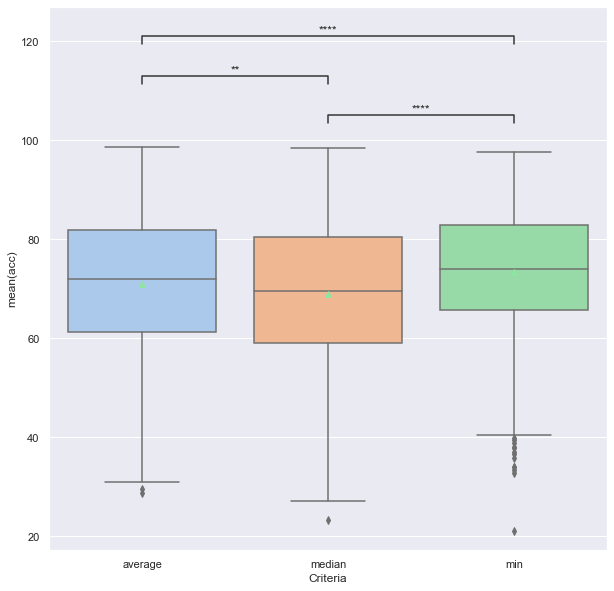

In [249]:

print(df_all["PCA"].unique())
x = "Normalization method"
x = "Criteria"
# x = "PCA"
y = "mean(acc)"
# y = "mean(f1)"
box_pairs=[

    # ("minmax", "z-score"),

    ("min", "average"),
    ("min", "median"),
    ("median", "average"),

    # ("1.0", "0.95"),
    # ("1.0", "0.9"),
    # ("1.0", "0.8"),
    # ("0.95", '0.9'),
    # ("0.95", "0.8"),
    # ("0.9", "0.8"),
    
    ]

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df_all, y=y,  x=x, showmeans=True,)
add_stat_annotation(ax, data=df_all, y=y, x=x,  
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

In [ ]:
import glob
path = os.path.join(working_path[:-5], "Archive", "results WS1", "pfeatures", "**", "*.xlsx")
df_all = pd.DataFrame()
for i in glob.glob(path):
    df = pd.read_excel(i, index_col = 0)
    foldername = i.split("\\")[-2]
    # print(foldername.split("_"))
    df["feature name"] = foldername.split("_")[2]
    df["Matching Score​​"] = foldername.split("_")[3]
    # print(df)
    # sys.exit()
    df_all = df_all.append(df)



In [273]:
import glob
path = os.path.join(working_path[:-5], "Archive", "results WS1", "afeatures-simple", "**", "*.xlsx")
df_all_a = pd.DataFrame()
for i in glob.glob(path):
    df = pd.read_excel(i, index_col = 0)
    foldername = i.split("\\")[-2]
    # print(foldername.split("_"))
    df["feature name"] = foldername.split("_")[2]
    df["Matching Score​​"] = foldername.split("_")[3]
    # print(df)
    # sys.exit()
    df_all_a = df_all_a.append(df)



p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

RANGE_corr v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.020e-51 U_stat=3.502e+04
RANGE_dist v.s. RDIST_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.168e-03 U_stat=1.466e+04
RANGE_dist v.s. TOTEX_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.743e+04
MFREQ_dist v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=7.977e-22 U_stat=2.907e+04
MDIST_dist v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.814e-08 U_stat=2.480e+04
All_dist v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.124e-01 U_stat=2.099e+04


(<AxesSubplot:xlabel='feature name', ylabel='EER'>,
  <statannot.StatResult.StatResult at 0x16b51275cd0>])

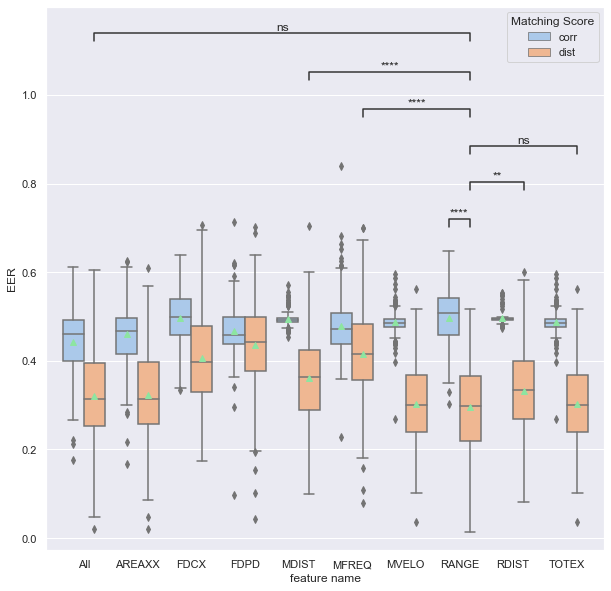

In [278]:

data = df_all
hue = 'Matching Score​​'
x = 'feature name'
y = 'EER'
box_pairs=[

    (('RANGE','dist'),('RANGE', 'corr')),
    (('RANGE','dist'),('All', 'dist')),
    (('RANGE','dist'),('TOTEX', 'dist')),
    (('RANGE','dist'),('RDIST', 'dist')),
    (('RANGE','dist'),('MFREQ', 'dist')),
    (('RANGE','dist'),('MDIST', 'dist')),

    ]

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, y=y,  x=x, hue=hue, showmeans=True,)
add_stat_annotation(ax, data=data, y=y, x=x, hue=hue, 
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

RANGE_corr v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=8.450e-53 U_stat=3.519e+04
RANGE_dist v.s. RDIST_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=5.238e-02 U_stat=1.558e+04
RANGE_dist v.s. TOTEX_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.750e+04
MFREQ_dist v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.683e-16 U_stat=2.753e+04
MDIST_dist v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=6.735e-06 U_stat=2.373e+04
All_dist v.s. RANGE_dist: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.285e-01 U_stat=2.052e+04


(<AxesSubplot:xlabel='feature name', ylabel='EER'>,
  <statannot.StatResult.StatResult at 0x16b53643580>])

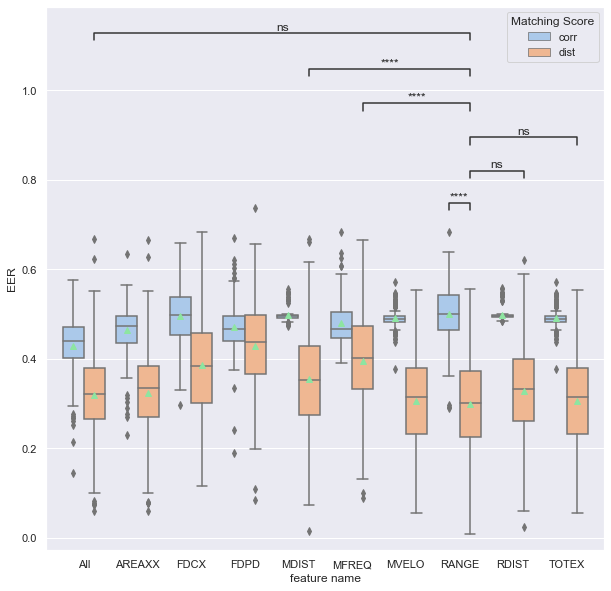

In [279]:
data = df_all_a
hue = 'Matching Score​​'
x = 'feature name'
y = 'EER'
box_pairs=[

    (('RANGE','dist'),('RANGE', 'corr')),
    (('RANGE','dist'),('All', 'dist')),
    (('RANGE','dist'),('TOTEX', 'dist')),
    (('RANGE','dist'),('RDIST', 'dist')),
    (('RANGE','dist'),('MFREQ', 'dist')),
    (('RANGE','dist'),('MDIST', 'dist')),

    
    ]

plt.figure(figsize=(10,10))
ax = sns.boxplot(data=data, y=y,  x=x, hue=hue, showmeans=True,)
add_stat_annotation(ax, data=data, y=y, x=x, hue=hue, 
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

SVM_mobilenet v.s. SVM_resnet50: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.308e-02 U_stat=1.548e+04
SVM_vgg16 v.s. SVM_resnet50: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.000e+00 U_stat=1.816e+04
SVM_efficientnet v.s. SVM_resnet50: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.020e-02 U_stat=1.530e+04
SVM_inception_v3 v.s. SVM_resnet50: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.490e-06 U_stat=1.286e+04
SVM_resnet50 v.s. Template_Matching_resnet50: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.246e-02 U_stat=2.152e+04


(<AxesSubplot:xlabel='clasifier', ylabel='mean(acc)'>,
  <statannot.StatResult.StatResult at 0x270c8482fd0>])

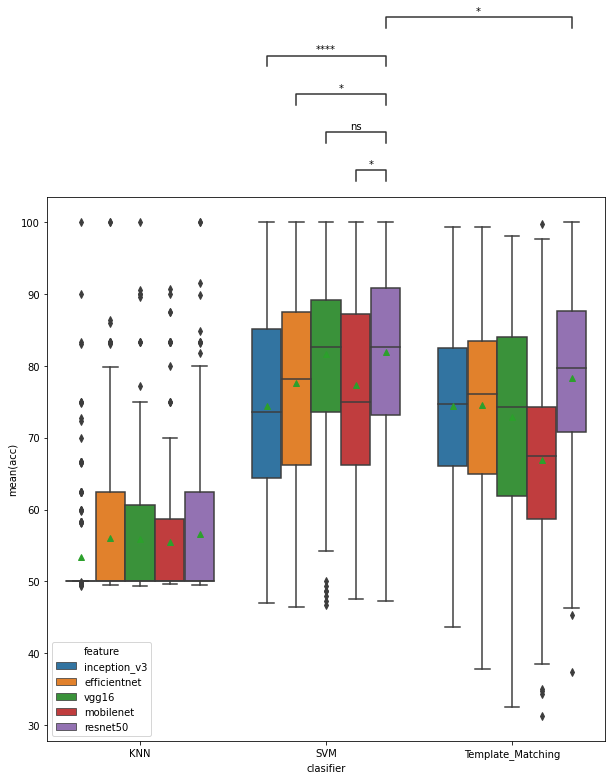

In [48]:
working_path = os.getcwd()

path = os.path.join(working_path[:-5], "Results.xlsx")

df = pd.read_excel(path, index_col = 0)


data = df
hue = "feature"
x = "clasifier"
y = "mean(acc)"
# ["knn_classifier", "svm_classifier", "Template_Matching_classifier"]
# space1=["vgg16.VGG16", "resnet50.ResNet50", "efficientnet.EfficientNetB0"]
box_pairs=[

    # (('Template_Matching','vgg16'),('SVM', 'vgg16')),
    (('Template_Matching','resnet50'),('SVM', 'resnet50')),
    # (('Template_Matching','mobilenet'),('SVM', 'mobilenet')),
    # (('Template_Matching','inception_v3'),('SVM', 'inception_v3')),
    # (('Template_Matching','efficientnet'),('SVM', 'efficientnet')),
    (('SVM','resnet50'),('SVM', 'inception_v3')),
    (('SVM','resnet50'),('SVM', 'efficientnet')),
    (('SVM','resnet50'),('SVM', 'mobilenet')),
    (('SVM','resnet50'),('SVM', 'vgg16')),
    ]

plt.figure(figsize=(10,10))
# g = sns.catplot(x=x, y=y,
#                  col=hue,
#                 data=data, kind="box",
#                 height=4, aspect=.7)
ax = sns.boxplot(data=data, y=y,  x=x, hue=hue, showmeans=True,)
add_stat_annotation(ax, data=data, y=y, x=x, hue=hue, 
                    box_pairs=box_pairs,
                    test='Mann-Whitney', text_format='star', loc='outside', verbose=2)

In [34]:
(df["feature_type"].unique())
(df["clasifier"].unique())
# df.columns[:20]

array(['KNN', 'SVM', 'Template_Matching'], dtype=object)